In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# We want our plots to appear in the notebook
%matplotlib inline 
## Models
from sklearn.neighbors import KNeighborsClassifier
## Model evaluators
from sklearn.model_selection import train_test_split

In [2]:
iris = pd.read_csv("Iris Flower/IRIS.csv") 
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.info


<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [5]:
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

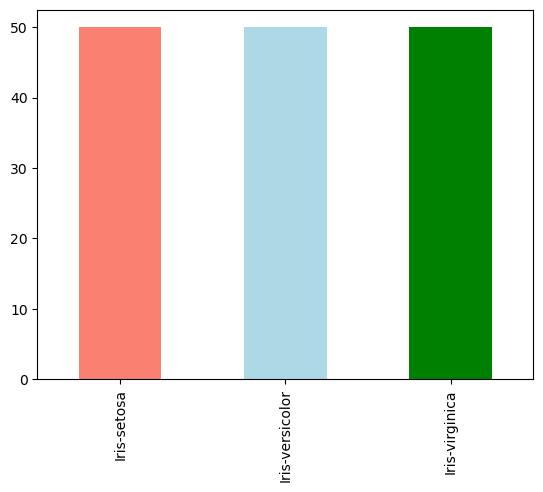

In [6]:
# Plot the value counts with a bar graph
iris.species.value_counts().plot(kind="bar", color=["salmon", "lightblue","green"]);

In [7]:
plt.style.use('seaborn-whitegrid') 
plt.style.use('seaborn')

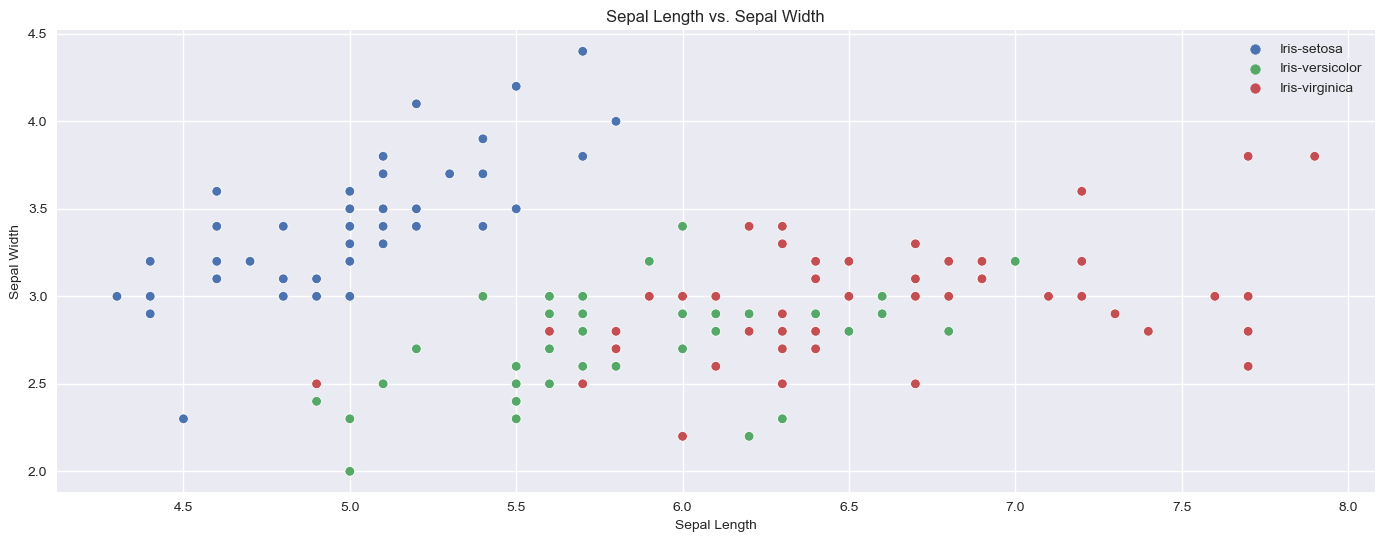

In [8]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.legend(loc='upper right')
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

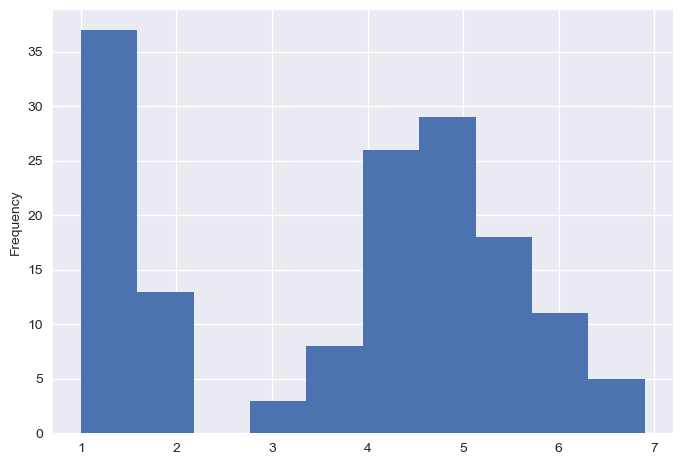

In [9]:
# Histograms are a great way to check the distribution of a variable
iris.petal_length.plot.hist();

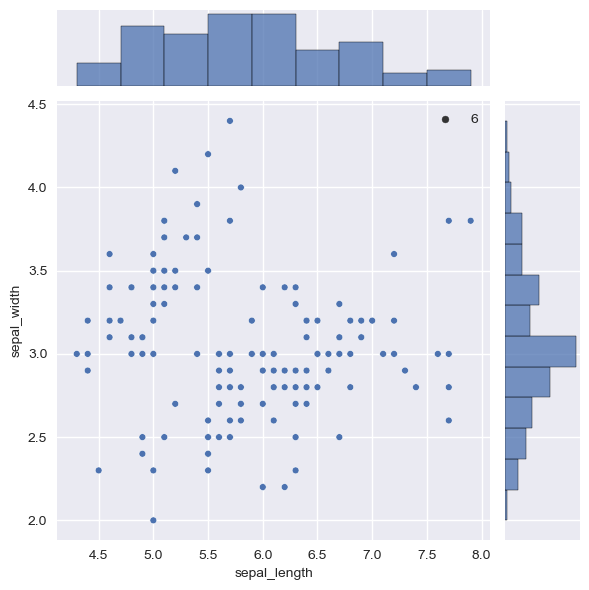

In [10]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=6);

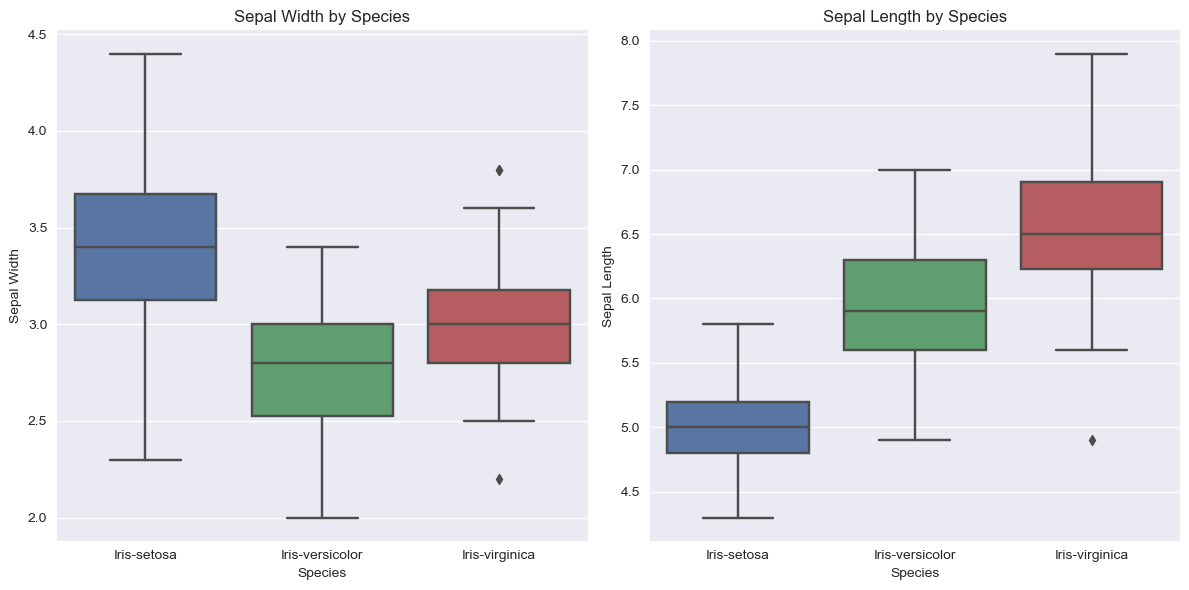

In [11]:
# Create subplots for sepal width and sepal length
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for sepal width
sns.boxplot(data=iris, x='species', y='sepal_width', ax=axes[0])
axes[0].set_title('Sepal Width by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Sepal Width')

# Box plot for sepal length
sns.boxplot(data=iris, x='species', y='sepal_length', ax=axes[1])
axes[1].set_title('Sepal Length by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Sepal Length')

plt.tight_layout()
plt.show()

In [12]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
# Find the correlation between our independent variables
corr_matrix = iris.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


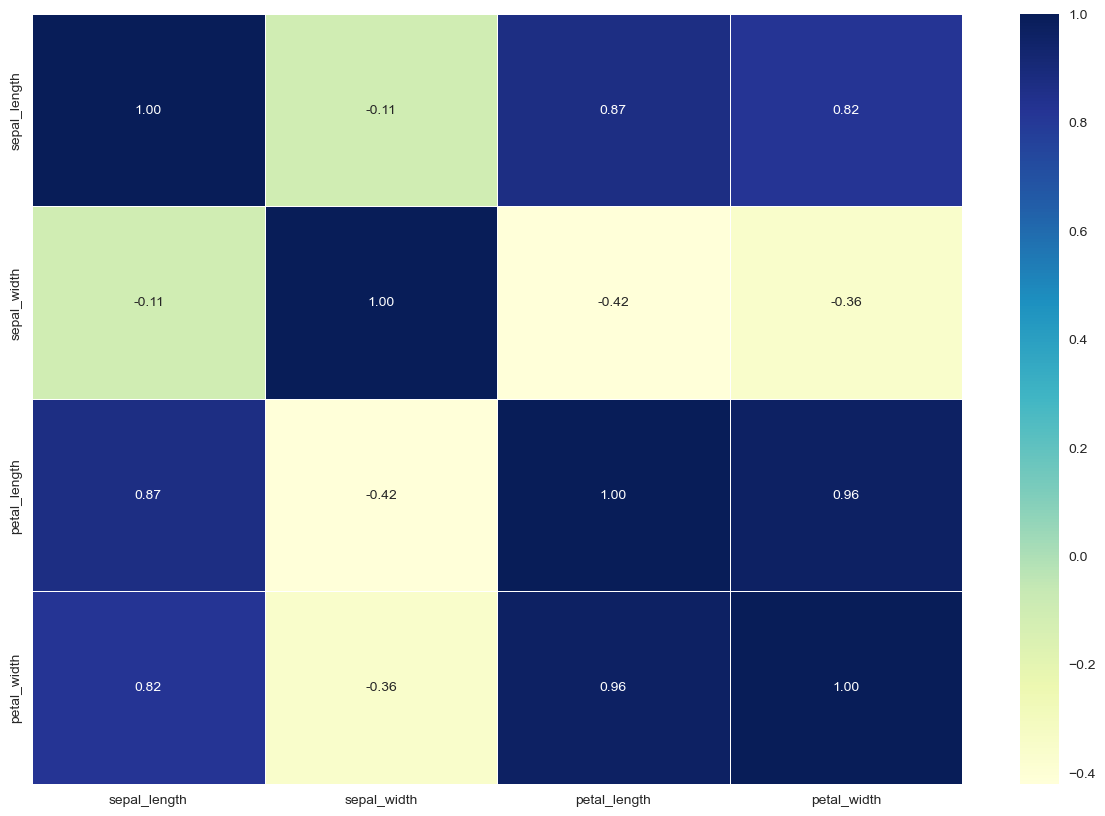

In [14]:
# Let's make it look a little prettier
corr_matrix = iris.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [15]:
# Everything except species variable
X = iris.drop("species", axis=1)

# Target variable
y = iris.species.values

In [16]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [17]:
model = KNeighborsClassifier(n_neighbors=3)
np.random.seed(42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

without scaling 100% accuracy

In [18]:
y_test

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [19]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
model = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    model.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    model.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(model.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(model.score(X_test, y_test))

Maximum KNN score on the test data: 100.00%


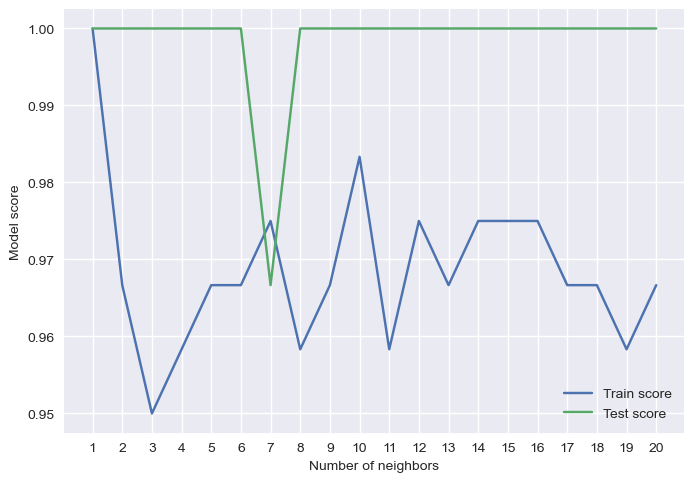

In [20]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [21]:
train_scores

[1.0,
 0.9666666666666667,
 0.95,
 0.9583333333333334,
 0.9666666666666667,
 0.9666666666666667,
 0.975,
 0.9583333333333334,
 0.9666666666666667,
 0.9833333333333333,
 0.9583333333333334,
 0.975,
 0.9666666666666667,
 0.975,
 0.975,
 0.975,
 0.9666666666666667,
 0.9666666666666667,
 0.9583333333333334,
 0.9666666666666667]

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 100.00%


In [25]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [26]:
new_sepal_length = 4.0
new_sepal_width = 4.9
new_petal_length = 3.0
new_petal_width = 4.2

In [27]:
new_data = [[new_sepal_length, new_sepal_width, new_petal_length, new_petal_width]]
prediction = model.predict(np.array(new_data))
print(prediction)

['Iris-versicolor']
